In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Initial condition, sets

In [2]:
# inital sets, position of x0 and p0. One important remark we use now specifit walue of n0, m0. Stability island
#from previous classes.
M = 100
n0 = 5
m0 = 20

x0 = 2*np.pi*n0/M
p0 = 2*np.pi*m0/M
heff = 2*np.pi/M # effective planck contants

n = np.arange(M) # corresponding to position (x)
m = np.arange(M) # corresponding to momentum (p)
# print(n)

# prepare the values of position (x) and momenta
x_list = np.zeros(M) # belongs to [0, 2*np.pi] each element
p_list = np.zeros(M) # belongs to [0, 2*np.pi] each element

for i in range(0, M):
    # position     
    x = 2*np.pi*n[i]/M
    x_list[i] = x
    # momenta
    p = 2*np.pi*m[i]/M
    p_list[i] = p

# Prepare normalized Gaussian wave packet: $\psi_{G} (x_{n})$

In [3]:
'''
We will prepare the normalised Gaussian wave packet. We will use following shortcuts:
    cal: calculate
    MoI: methof of images
    norm: normalisation
    f: factor
    
In this cell we just set some of functions, which we will use to find normalised Gaussian
wave packet
'''

################################ AMPLITUDE AND NORMALISATION ################################
def cal_amplitude(_wave):
    """
    Calculate the amplitude of taken single _wave function
    
    :param: _wave: single wave function [complex vector].
    return: the amplitude of _wave function [float]
    """
    amplitude = _wave.real * _wave.real + _wave.imag * _wave.imag
    return amplitude

def cal_norm(_sup_waves):
    """
    Find the normalisation of the superpositions of wave functions
    
    :param: _sup_waves: list of wave functions, which create superpositions wave function.
                        In different word we take into account every wave function, which
                        exists in system.
    return: normalisation factor
    """
    n_waves = len(_sup_waves) # number of waves
    f_norm = 0
    
    for i in range(0,n_waves):
        amplitude = cal_amplitude(_sup_waves[i])
        f_norm = f_norm + np.sqrt(amplitude)
    
    return f_norm

################################ SINGLE WAVE FUNCTION ################################
def psi0(x):
    """
    :param: x: descritised position
    return: single wave function [complex vector].
    """
    val_psi0 = np.exp(1j * p0 * x / heff) * np.exp(- (x - x0)**2 / (2 * heff))
    return val_psi0

def cal_wave_MoI(x):
    """
    take linear combination of some wave function: 'method of images'
    that gives us wave function, which is periodic.
    
    :param: x: descritised position
    return: superposition of few wave functions [complex vector]
    """
    # we will sum up for |d| = 4.
    val_psiG = 0
    for d in range(-4,4):
        val_psiG = val_psiG + psi0(x + 2*np.pi*d)
    
    return val_psiG

In [4]:
def normGaussianPacked(_x_list):
    """
    Find the normalised gaussian wave function (position).
    
    :param: _x_list: list containg the values of position.
    return: normalised gaussian wave factor list of [complex vector].
    """
    M = len(_x_list)
    psiG = np.zeros(M, dtype=complex) # complex vector
    
    #calculate gaussian wave package
    for i in range(0, M):
        x = _x_list[i]
        # calculate gaussian packaked
        val_psiG = cal_wave_MoI(x)
        psiG[i] = val_psiG
        
    # find normalised factor
    f_norm = cal_norm(psiG)
    
    # rescalled gaussian wave packed: Normalisation
    for i in range(0, M):
        psiG[i] = 1/f_norm * psiG[i]

    return psiG

# lest check
psiG = normGaussianPacked(x_list)
# print(psiG)

f_norm = cal_norm(psiG)
print('normalised factor of normalised gaussian wave function is (should be 1):', f_norm)

normalised factor of normalised gaussian wave function is (should be 1): 0.9999999999999993


# Plot probability of gaussian wave function (position)

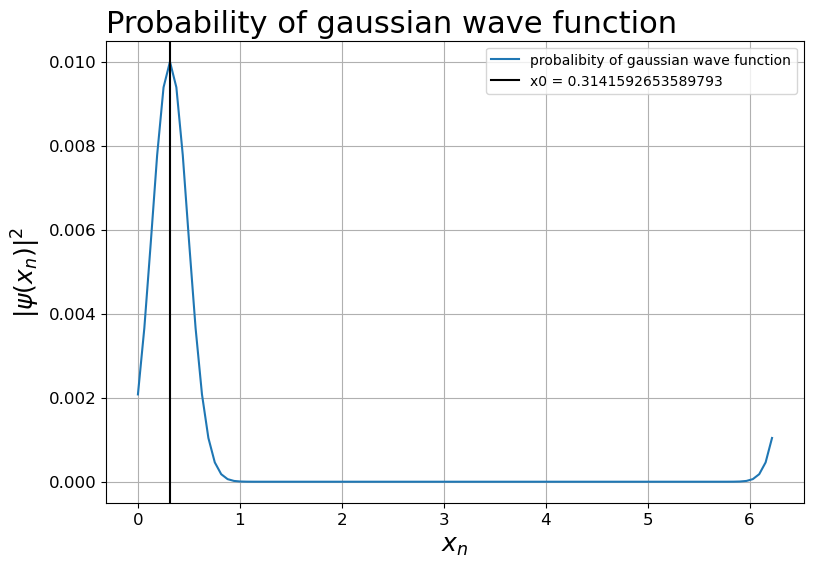

In [5]:
# initall condition
prob_psiG = np.zeros(M)
psiG = normGaussianPacked(x_list)

for i in range(0, M):
    # probability
    val_pro_psiG = cal_amplitude(psiG[i])
    prob_psiG[i] = val_pro_psiG
    
fig, ax = plt.subplots(figsize=(9.0, 6.0))
ax.set_title('Probability of gaussian wave function', fontsize=22, loc='left')
# data
ax.plot(x_list, prob_psiG, label='probalibity of gaussian wave function')
# plt.axvline(x=x0, color='black', '-')
plt.axvline(x = x0, color = 'black', label = f'x0 = {x0}')

# describtion
ax.set_ylabel(r"$|\psi(x_{n})|^2$", fontsize=18)
ax.set_xlabel(r"$x_{n}$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True)

ax.legend()
plt.show()

# Prepare normalized Gaussian wave packet: $\tilde{\psi}_{G} (p_{n})$

In [6]:
"""
Now we are interested in momentum description of wave function. Using \psi(x_n)
we can acts on that by fast fourier transformation to land in momentum space.

Chanhing the description from one space to another:
    FFT(wave(x)) -> wave(p)
    IFFT(wave(p)) -> wave(x)
    
    tilda: will refer to wave function in lied in momentum description / space.
"""
def normGaussianPacked_tilda(_x_list):
    """
    Find the normalised gaussian wave function (momentum).
    
    :param: _x_list: list containg the values of position.
    return: normalised gaussian wave factor list of [complex vector].
    """
    # position descriptio
    psiG = normGaussianPacked(_x_list)
    # go to the momentum space
    psiG_tilda = fft(psiG)
    
    # now we have to normalised
    f_norm = cal_norm(psiG_tilda)
    
    for i in range(0, len(_x_list)):
        psiG_tilda[i] = 1/f_norm * psiG_tilda[i]
    
    return psiG_tilda


# lest check
psiG_tilda = normGaussianPacked_tilda(x_list)
# print(psiG)

f_norm = cal_norm(psiG_tilda)
print('normalised factor of normalised gaussian wave function is (should be 1):', f_norm)

normalised factor of normalised gaussian wave function is (should be 1): 1.0


# Plot probability of gaussian wave function (momentum)

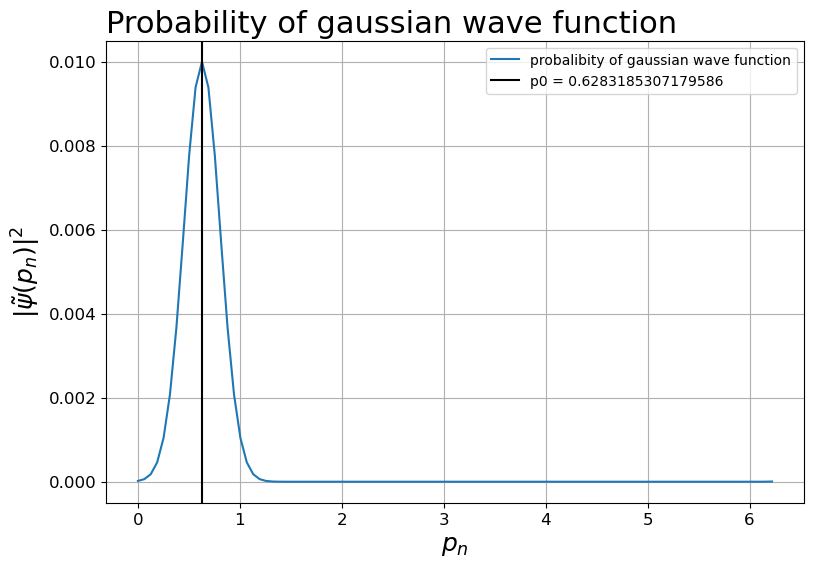

In [14]:
# plotting
prob_psiGP_tilda = np.zeros(M)
psig_tilda = normGaussianPacked_tilda(x_list)

for i in range(0, M):
    # probability
    val_pro_psiG_tilda = cal_amplitude(psig_tilda[i])
    prob_psiGP_tilda[i] = val_pro_psiG_tilda
    
fig, ax = plt.subplots(figsize=(9.0, 6.0))
ax.set_title('Probability of gaussian wave function', fontsize=22, loc='left')
# data
ax.plot(p_list, prob_psiGP_tilda, label='probalibity of gaussian wave function')
# plt.axvline(x=x0, color='black', '-')
plt.axvline(x = p0, color = 'black', label = f'p0 = {p0}')

# describtion
ax.set_ylabel(r"$|\tilde{\psi}(p_{n})|^2$", fontsize=18)
ax.set_xlabel(r"$p_{n}$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True)

ax.legend()
plt.show()

In [12]:
z = complex(2, -3)
print(z)

print(z.real)
print(z.imag)

(2-3j)
2.0
-3.0
